###Задача 1

Перед вами результаты наблюдений длительности нахождения человека в очереди в зависимости от количества людей в этой очереди.
*Вам нужно только вставить ссылку на свои данные*

In [764]:
import pandas as pd
data_frame = pd.read_csv("/content/input.csv")
data_frame

,id,X,Y
0,1,14,36
1,2,21,49
2,3,25,72
3,4,8,24
4,5,20,56
5,6,18,48
6,7,17,51
7,8,3,10
8,9,1,3
9,10,10,32


Обучите модель линейной регрессии для прогнозирования и введите указанные параметры.

In [765]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(data_frame[['X']], data_frame[['Y']])

Определите выборочное среднее X с чертой:

In [766]:
data_frame['X'].mean()

13.7

Определите выборочное среднее Y с чертой :

In [767]:
data_frame["Y"].mean()

38.1

Найдите коэффициент Тетта1 :

In [768]:
reg.coef_[0]

array([2.63817514])

Найдите коэффициенты Тетта0 :

In [769]:
reg.intercept_

array([1.95700052])

Оцените точность модели, вычислив R^2 статистику:  

In [770]:
from sklearn.metrics import r2_score
y = reg.predict(data_frame[["X"]])
r2_score(data_frame.Y, y)

0.9676535870007654

###Задача 2


Представленный набор данных — это набор данных о семи различных типах рыб, продаваемых в некоторой рыбной лавке. Цель заключается в том, чтобы предсказать массу рыбы по каким-то косвенным признакам, известным о рыбе. Сами признаки, быть может, нужно синтезировать из тех, что известны.

ВАЖНО: Задания с подробными пояснениями представлены в блокноте. Выполняя задания в блокноте, следует вводить полученные ответы в соответствующие поля ввода ниже. Рекомендуем вводить ответы поэтапно, для этого специально предусмотрено достаточное количество попыток.

In [771]:
import pandas as pd
data_frame = pd.read_csv("https://courses.openedu.ru/assets/courseware/v1/fed9823d73d2b53f5591d98b87c20b8a/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/fish_train.csv")
data_frame

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
...,...,...,...,...,...,...,...
114,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
115,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
116,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
117,Perch,120.0,20.0,22.0,23.5,6.1100,3.4075



При помощи train_test_split() разбейте набор данных на обучающую и тестовую выборки с параметрами test_size=0.2, random_state=11. Используйте стратификацию по колонке Species. Стратификация позволит сохранить доли представленных объектов (по представителям типов рыб) в тренировочной и тестовой выборках.

In [772]:
random_state_value = 11

In [773]:
from sklearn.model_selection import train_test_split
new_data_frame = data_frame.drop("Species", axis=1)
X = new_data_frame.drop("Weight", axis=1)
Y = new_data_frame["Weight"]

x, x_test, y, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state_value, stratify=data_frame["Species"])

Вычислите выборочное среднее колонки Width полученной тренировочной выборки.

In [774]:
x.Width.mean()

4.498425263157893

####1. Построение базовой модели

Избавьтесь от категориальных признаков и обучите модель линейной регрессии (LinearRegression()) на тренировочном наборе данных. Выполните предсказания для тестового набора данных. 
Оцените модель при помощи метрики r2_score().

Введите r2_score() полученной модели.

In [775]:
from sklearn.metrics import r2_score
pred = LinearRegression().fit(x, y).predict(x_test)
r2_score(y_test, pred)


0.8244231342772975

####2. Добавление предварительной обработки признаков.

***Использование PCA.***


Перечислите через запятую и пробел тройку отбрасываемых наиболее коррелированных признаков.

,Weight,Length1,Length2,Length3,Height,Width
Weight,114808.650244,2922.717935,3146.487628,3417.734719,1069.503723,509.955419
Length1,2922.717935,92.409805,99.038974,105.901792,25.298180,13.912350
Length2,3146.487628,99.038974,106.259147,113.838522,27.831578,15.033419
Length3,3417.734719,105.901792,113.838522,123.567366,33.145370,16.281676
Height,1069.503723,25.298180,27.831578,33.145370,17.908689,5.566149
Width,509.955419,13.912350,15.033419,16.281676,5.566149,2.818355


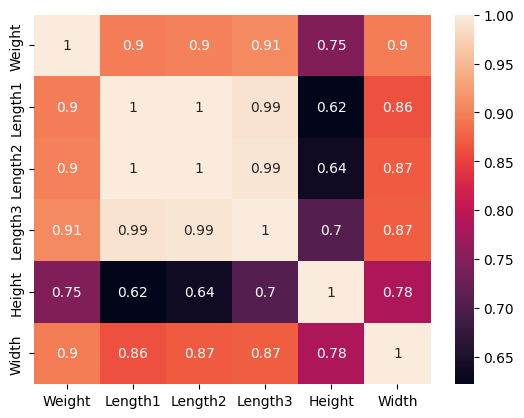

In [776]:
from sklearn.decomposition import PCA
import seaborn as sns
sns.heatmap(new_data_frame.corr(), annot=True)
new_data_frame.cov()

В этом случае тройка выглядит следующим образом: 
correlated_features = ["Length1", "Length2", "Length3"]

In [777]:
correlated_features = ['Length1', 'Length2', 'Length3']
x_fixed = x.copy()


Обучите модель PCA для трех наиболее коррелированных признаков. Введите долю объясненной дисперсии при использовании только первой главной компоненты.

In [778]:
pca = PCA(n_components=1, svd_solver='full')
pca.fit(x[correlated_features])
pca.explained_variance_ratio_

array([0.99609378])

Замените тройку наиболее коррелированных признаков на полученный признак Lengths, значения которого совпадают со счетами первой главной компоненты.

In [779]:
x['Lengths'] = pca.transform(x[correlated_features])
x_test['Lengths'] = pca.transform(x_test[correlated_features])
x = x.drop(correlated_features, axis = 1)
x_test = x_test.drop(correlated_features, axis = 1)
x

,Height,Width,Lengths
97,7.0866,3.9060,-5.647250
37,12.6040,8.1420,24.959486
21,11.7300,7.2250,19.068600
40,10.3458,3.6636,-9.496090
116,12.3540,6.5250,19.848407
...,...,...,...
8,8.1454,4.2485,-3.765734
78,7.7920,4.8700,29.673332
95,6.5772,2.3142,-22.699698
58,10.8810,6.8640,13.284734


Обучите модель линейной регрессии. Введите r2_score() полученной модели.

In [780]:
reg = reg.fit(x, y)
pred = reg.predict(x_test)
r2_score(y_test, pred)

0.8207366051929542

***Модификация признаков.***

Используя полученный на предыдущем этапе набор данных, возведите в куб значения признаков Width, Height, Lengths. Введите выборочное среднее колонки Width тренировочного набора данных после возведения в куб.

In [781]:
x_in_cube = x**3
x_test_in_cube = x_test**3
x_in_cube['Width'].mean()

129.56198433393484

Изображения, соответствующие зависимости Weight от Width до преобразования и после.

<Axes: xlabel='Width', ylabel='Weight'>

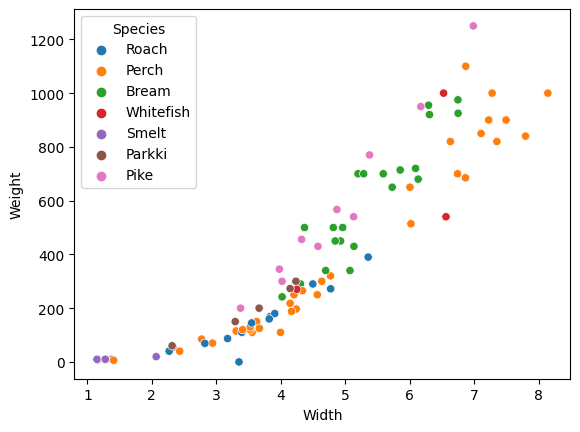

In [782]:
sns.scatterplot(x=x['Width'], y=y, hue=data_frame['Species'] )

<Axes: xlabel='Width', ylabel='Weight'>

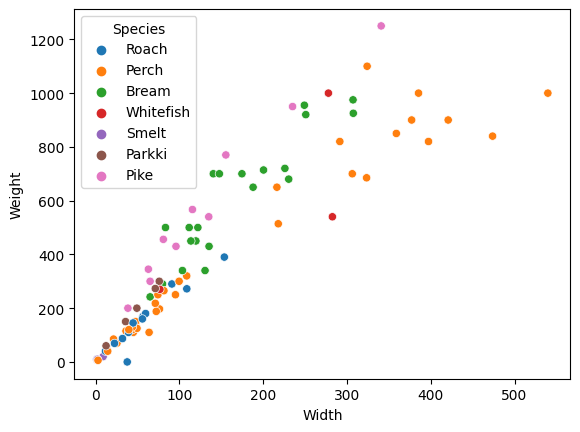

In [783]:
sns.scatterplot(x=x_in_cube['Width'], y=y, hue=data_frame['Species'] )

Обучите модель линейнной регрессии. Введите r2_score() полученной модели.

In [784]:
reg = LinearRegression().fit(x_in_cube, y)
pred = reg.predict(x_test_in_cube)
r2_score(y_test, pred)

0.9701660036773103

***Добавление категориальных признаков.***

Добавьте к набору данных, полученному на предыдущем этапе, ранее исключенные категориальные признаки, предварительно произведя one-hot кодирование при помощи pd.get_dummies().

In [785]:
X = data_frame.drop("Weight", axis=1)
Y = data_frame["Weight"]

x, x_test, y, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state_value, stratify=data_frame["Species"])
x_species = x["Species"]
x_test_species = x_test["Species"]


x_in_cube_one_hot = x_in_cube.join(pd.get_dummies(x_species))
x_test_in_cube_one_hot = x_test_in_cube.join(pd.get_dummies(x_test_species))

Обучите модель регрессии. Введите r2_score() полученной модели.

In [786]:
pred = reg.fit(x_in_cube_one_hot, y).predict(x_test_in_cube_one_hot)
r2_score(y_test, pred)

0.9679628452773985

Закодируйте категориальные признаки при помощи pd.get_dummies(drop_first=True).

In [787]:
x_in_cube_one_hot_drop_first = x_in_cube.join(pd.get_dummies(x_species, drop_first=True))
x_test_in_cube_one_hot_drop_first = x_test_in_cube.join(pd.get_dummies(x_test_species, drop_first=True))

Введите r2_score() модели после избавления от коррелированности.

In [788]:
pred = reg.fit(x_in_cube_one_hot_drop_first, y).predict(x_test_in_cube_one_hot_drop_first)
r2_score(y_test, pred)

0.9679628452773898

###Задача 3

Используя весь датасет из предыдущего задания как обучающий, выполните предсказания для следующего набора данных (https://courses.openedu.ru/assets/courseware/v1/33b24e589714e963ea7081912668c93d/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/fish_reserved.csv). Для успешного выполнения задания необходимо, чтобы ваш результат превысил пороговое значение, равное 0.98. В качестве метрики используется r2_score.

In [789]:
from sklearn.model_selection import train_test_split
x = data_frame.drop("Weight", axis=1)
y = data_frame["Weight"]
x_species = x["Species"]

test_df = pd.read_csv("https://courses.openedu.ru/assets/courseware/v1/33b24e589714e963ea7081912668c93d/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/fish_reserved.csv")
x_test = test_df
x_test_spices = x_test["Species"]
x = x.drop("Species", axis=1)
x_test = x_test.drop("Species", axis=1)


x_in_cube = x**3
x_test_in_cube = x_test**3



reg = LinearRegression().fit(x_in_cube, y)
pred = reg.predict(x_test_in_cube)
pred

array([ 116.13958959,  121.09100633,   85.05844589,  110.53741817,
         86.26816447,  158.37190267,   60.38379001,  536.00402273,
        395.87203138,  123.78191529, 1827.47451205,  158.49720347,
        627.26572214, 1085.86942862,   35.8288348 ,  606.29580347,
        133.25451084,  807.75274166, 1398.16595075,   85.30337754,
        591.8721016 ,  196.54465434,   81.7781292 ,  156.43159457,
        350.58923309,  590.54188771,  277.05633793,   26.21268469,
         37.39281599,   21.54240282, 1001.17770307,  477.89521046,
        542.29161919,  151.53091357,   26.07114895,   87.52795656,
        122.12694929,  932.88325856,  744.70163842,  130.42604977])